In [103]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import nltk
from textblob import TextBlob

df = pd.read_csv('rejection_query_filter2.csv', low_memory=False)

In [2]:
df.head()

,﻿PayPal payment failed: Account ivanov.oro@gmail.com is restricted,0,1
0,Beneficiary name incorrect,2,1
1,Invalid Bank code / Branch code combination,6,1
2,"16,145,11818,,,91000012443093/\r\n88,COMPANY N...",6,1
3,"16,145,185335,,,91000014238477/\r\n88,COMPANY ...",3,1
4,Payment was rejected due to invalid routing in...,6,1


In [58]:
import string
import random

df.columns = ['Key', 'PaymentMethod', 'Count']
df['Key'] = df['Key'].str.lower()
# df.sort(['Count'], ascending= False)


In [4]:
# df.tail(12)


In [5]:
NoPM = {}
PayPal = {}
WireTransfer = {}
Payoneer = {}
ACH = {}
Check = {}
Cash = {}
eCheck = {}
HoldMyPayments = {}
Custom = {}



In [6]:
sum_errors = df['Count'].sum(axis=0)


In [7]:
# we are going to check status_list such that
def add_to_dict(the_dict, reason, count, row_text):
    if reason in the_dict:
        the_dict[reason][0].append(row_text)
        the_dict[reason][1] += count
    else:
        the_dict[reason] = [[], 0]
        the_dict[reason][0].append(row_text)
        the_dict[reason][1] += count

# NoPM = {}
# PayPal = {}
# Payoneer = {}
# WireTransfer = {}
# ACH = {}
# Check = {}
# Cash = {}
# eCheck = {}
# Custom = {}
    
for index, row in df.iterrows():
    row_key = row['Key']
    row_count = row['Count']
    row_pm = row['PaymentMethod']
    if row_pm == -1:
        row_paymentMethod = NoPM
    if row_pm == 0:
        row_paymentMethod = PayPal
    if row_pm == 1:
        row_paymentMethod = Payoneer
    if row_pm == 2:
        row_paymentMethod = WireTransfer
    if row_pm == 3:
        row_paymentMethod = ACH
    if row_pm == 4:
        row_paymentMethod = Check
    if row_pm == 5:
        row_paymentMethod = Cash
    if row_pm == 6:
        row_paymentMethod = eCheck
    if row_pm == 7:
        row_paymentMethod == Custom
    is_noun = lambda pos: pos[:2] == 'NN'
    if pd.isnull(row_key):
        continue
    else:
        row_key = ''.join([i for i in row_key if not i.isdigit()])
        if 'routing code' in row_key or 'routing number' in row_key or 'aba' in row_key or 'routing information' in row_key:
            add_to_dict(row_paymentMethod, 'routing_code', row_count, row_key)
        elif row_pm == 0 and 'reject' in row_key:
            add_to_dict(row_paymentMethod, 'paypal_rejected', row_count, row_key)
        elif 'ifsc' in row_key:
            add_to_dict(row_paymentMethod, 'ifsc', row_count, row_key)
        elif 'swift code' in row_key or 'swift' in row_key:
            add_to_dict(row_paymentMethod, 'swift_code', row_count, row_key)
        elif ('check' in row_key or 'cheque' in row_key) and 'stop' in row_key:
            add_to_dict(row_paymentMethod, 'check_stopped', row_count, row_key)
        elif ('refund' in row_key or 'return' in row_key) and len(row_key) < 200:
            add_to_dict(row_paymentMethod, 'refund_return', row_count, row_key)
        elif 'iban' in row_key:
              add_to_dict(row_paymentMethod, 'iban', row_count, row_key)
        elif 'branch code' in row_key or 'bank branch' in row_key:
            add_to_dict(row_paymentMethod, 'bank_code_branch_code', row_count, row_key)
        elif 'not collect' in row_key or 'claim' in row_key:
            add_to_dict(row_paymentMethod, 'not_collected', row_count, row_key)
        elif 'address' in row_key or 'zip' in row_key:
            add_to_dict(row_paymentMethod, 'address', row_count, row_key)
        elif 'payment source' in row_key and 'no' in row_key:
            add_to_dict(row_paymentMethod, 'no_payment_source', row_count, row_key)
        elif 'not supported in' in row_key:
            add_to_dict(row_paymentMethod, 'currency', row_count, row_key)
        elif 'test' in row_key:
            add_to_dict(row_paymentMethod, 'test', row_count, row_key)
        elif 'mass' in row_key and 'pay' in row_key:
            add_to_dict(row_paymentMethod, 'mass_pay', row_count, row_key)
        elif 'no such account' in row_key:
            add_to_dict(row_paymentMethod, 'no_such_account', row_count, row_key)
        elif 'tipalti' in row_key and 'error' in row_key:
            add_to_dict(row_paymentMethod, 'tipalti_error', row_count, row_key)
        elif 'support review' in row_key:
            add_to_dict(row_paymentMethod, 'support_review', row_count, row_key)
        elif 'internal error' in row_key:
            add_to_dict(row_paymentMethod, 'internal_error', row_count, row_key)
        elif 'payee' in row_key and 'not exist' in row_key:
            add_to_dict(row_paymentMethod, 'payee_not_exist', row_count, row_key)
        else:
            if 'reject' in row_key and 'payee' in row_key:
                add_to_dict(row_paymentMethod, 'rejected_by_payee', row_count, row_key)
#             tokenized = nltk.word_tokenize(row_key)
#             nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
#             if 'check' in nouns or 'cheque' in nouns:
#                 add_to_dict(row_paymentMethod, 'ifsc', row_count, row_key)
            elif 'payer' in row_key and 'cancel' in row_key:
                add_to_dict(row_paymentMethod, 'rejected_by_payer', row_count, row_key)
            elif 'payer' in row_key and 'reject' in row_key:
                add_to_dict(row_paymentMethod, 'rejected_by_payer', row_count, row_key)
            elif 'payer' in row_key and 'recall' in row_key:
                add_to_dict(row_paymentMethod, 'rejected_by_payer', row_count, row_key)
#             elif 'recall' in row_key or 'reject' in row_key or 'cancel' in row_key:
#                 add_to_dict(row_paymentMethod, 'rejected_general', row_count, row_key)
            elif 'currency' in row_key:
                add_to_dict(row_paymentMethod, 'currency', row_count, row_key)
            elif 'bank code' in row_key:
                add_to_dict(row_paymentMethod, 'bank_code_branch_code', row_count, row_key)
            elif 'beneficiary' in row_key:
                add_to_dict(row_paymentMethod, 'beneficiary', row_count, row_key)
            elif 'phone number' not in row_key and ('bank account' in row_key and 'number' in row_key) or 'account number' in row_key:
                add_to_dict(row_paymentMethod, 'account_number', row_count, row_key)
            elif len(row_key)<200 and 'bank account' and 'name' in row_key or 'account name' in row_key:
                add_to_dict(row_paymentMethod, 'account_name', row_count, row_key)
            elif 'frozen' in row_key or 'closed' in row_key:
                add_to_dict(row_paymentMethod, 'closed_frozen', row_count, row_key)
            elif ('account' in row_key or 'bank account' in row_key) and len(row_key)<200:
                add_to_dict(row_paymentMethod, 'account_other', row_count, row_key)
            elif 'bank' in row_key and len(row_key)<200:
                add_to_dict(row_paymentMethod, 'bank_details', row_count, row_key)
            elif 'info' in row_key or 'document' in row_key:
                add_to_dict(row_paymentMethod, 'lack_of_doc_info', row_count, row_key)
            elif 'missing' in row_key:
                add_to_dict(row_paymentMethod, 'lack_of_doc_info', row_count, row_key)
#             elif 'valid' in row_key or 'correct' in row_key:
#                 add_to_dict(row_paymentMethod, 'invalid', row_count, row_key)
            else:
                if len(row_key) > 200:
                    add_to_dict(row_paymentMethod, 'not_classified_unreadable', row_count, row_key)
                    
                else:
                    add_to_dict(row_paymentMethod, 'not_classified_readable', row_count, row_key)
                    

In [8]:
result_df = pd.DataFrame(columns = ['PaymentMethod', 'Reason', 'Count', 'Percentage'])

In [9]:
result_df.columns = ['PaymentMethod', 'Reason', 'Count', 'Percentage']
for key, value in NoPM.items():
    temp_dict = [{'PaymentMethod': 'NoPM', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in PayPal.items():
    temp_dict = [{'PaymentMethod': 'PayPal', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in Payoneer.items():
    temp_dict = [{'PaymentMethod': 'Payoneer', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in WireTransfer.items():
    temp_dict = [{'PaymentMethod': 'WireTransfer', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in ACH.items():
    temp_dict = [{'PaymentMethod': 'ACH', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in Check.items():
    temp_dict = [{'PaymentMethod': 'Check', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in Cash.items():
    temp_dict = [{'PaymentMethod': 'Cash', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in eCheck.items():
    temp_dict = [{'PaymentMethod': 'eCheck', 'Reason': key, 'Count':value[1],'Percentage': (value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    
for key, value in Custom.items():
    temp_dict = [{'PaymentMethod': 'Custom', 'Reason': key, 'Count':value[1],'Percentage': 100*(value[1]/sum_errors)}]
    result_df = result_df.append(temp_dict, ignore_index = True)
    

In [10]:
# for index, row in result_df.iterrows():
#     if row['Percentage'] < 0.1:
#         row_key = row['Reason']
#         row_count = row['Count']
#         row['PaymentMethod']['not_classified_readable'][0].append(row_key)
#         row['PaymentMethod']['not_classified_readable'][1] += row_count
#         row['PaymentMethod'].pop(row_key, None)

In [12]:
result_df.head()

,PaymentMethod,Reason,Count,Percentage
0,PayPal,not_classified_readable,5.0,0.000831
1,PayPal,paypal_rejected,1231.0,0.204519
2,PayPal,refund_return,14.0,0.002326
3,PayPal,account_other,8.0,0.001329
4,PayPal,mass_pay,986.0,0.163815


In [13]:
result_df['Percentage'] = result_df['Percentage'].apply(lambda x: x*100)

In [30]:
# result_df.sort_values(by = 'Percentage', ascending= False)

In [15]:
small_list = []
long_list =[]

for index, row in result_df.iterrows():
    if row['Percentage'] < 0.1:
        small_list.append(row)
    else:
        long_list.append(row)
        

small_list_df = pd.DataFrame.from_records(small_list)
long_list_df = pd.DataFrame.from_records(long_list)

In [31]:
long_list_df.head()

,PaymentMethod,Reason,Count,Percentage
0,PayPal,paypal_rejected,1231.0,20.451902
1,PayPal,refund_return,14.0,0.232597
2,PayPal,account_other,8.0,0.132912
3,PayPal,mass_pay,986.0,16.381459
4,PayPal,not_collected,95.0,1.578335


In [17]:
eCheck['account_number']

[['bank account number is invalid or incorrect.  please make sure only the account number itself is entered',
  "please make sure only you account number is filled in the 'account number' field",
  "payee 'name on account' and 'account number' do not match remote bank records. ",
  'account number provided is invalid or incorrect',
  'cpf is invalid.  account number is invalid',
  'bank account number is invalid or incorrect',
  'payee name and account number do not match remote bank records',
  'payee `name on account number` do not match remote bank records',
  'bank account number supplied is invalid',
  'bank account number provided is invalid. ',
  "payee `name on account` and 'account number' does not match remote bank records",
  'account number is invalid or incorrect',
  'bank account number provided is invalid or incorrect',
  'account number provided is too long. please make sure only the account number itself is entered to that field.',
  'incorrect account number',
  "plea

In [42]:
pm_count_sum = {}
reason_count_sum ={}
for index, row in result_df.iterrows():
    pm = row['PaymentMethod']
    reason = row['Reason']
    count = row['Count']
    perc = row['Percentage']
    if pm in pm_count_sum:
        pm_count_sum[pm] = pm_count_sum[pm] + count
    else:
        pm_count_sum[pm] = count
        
for index, row in result_df.iterrows():
    pm = row['PaymentMethod']
    reason = row['Reason']
    count = row['Count']
    perc = row['Percentage']
    if reason in reason_count_sum:
        reason_count_sum[reason] = reason_count_sum[reason] + count
    else:
        reason_count_sum[reason] = count

In [54]:
pm_count_sum_df = pd.DataFrame(list(pm_count_sum.items()), columns=['PaymentMethod', 'Count'])
reason_count_sum_df = pd.DataFrame(list(reason_count_sum.items()), columns=['Reason', 'Count'])

In [55]:
pm_count_sum_df

,PaymentMethod,Count
0,Payoneer,121.0
1,Check,173.0
2,PayPal,2339.0
3,eCheck,930.0
4,WireTransfer,1003.0
5,ACH,1453.0


In [72]:
import plotly.plotly as py              # for sending things to plotly
import plotly.tools as tls              # for mpl, config, etc.
import plotly.graph_objs as go         # __all__ is safely defined
import cufflinks as cf

py.sign_in('cheyeonhyun', '7xcnf381pv')

In [40]:
cf.set_config_file(world_readable=True,offline=False)

In [67]:
pm_count_sum_df.iplot(kind = 'pie', labels = 'PaymentMethod', values = 'Count', filename = 'payment_method_reject')

In [104]:
import matplotlib.pyplot as plt

In [105]:
import matplotlib
matplotlib.style.use('ggplot')

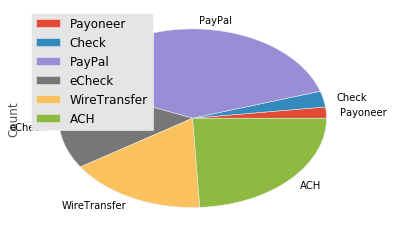

In [108]:
pm_count_sum_df.plot.pie(labels = pm_count_sum.keys(), y = 'Count')
plt.show()

In [76]:
# data1 = [go.Pie(labels =pm_count_sum_df['PaymentMethod'], values =  pm_count_sum_df['Count'])]

In [87]:
# url = py.plot(data1, filename='pandas-pi-paymentMethod')

In [88]:
# print(url)

https://plot.ly/~cheyeonhyun/32


In [57]:
reason_count_sum_df.iplot(kind = 'pie', labels = 'Reason', values = 'Count')

In [79]:
# data2 = [go.Pie(labels =reason_count_sum_df['Reason'], values =  reason_count_sum_df['Count'])]

In [89]:
# url2 = py.plot(data2, filename='pandas-pi-reason')

In [90]:
print(url2)

https://plot.ly/~cheyeonhyun/34


In [23]:
# result_df.iplot(kind='pie',labels='PaymentMethod',values='Count')

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [110]:
graphs = ['https://plot.ly/~cheyeonhyun/32', 'https://plot.ly/~cheyeonhyun/34' ]

from IPython.display import display, HTML

template = (''
    '<a href="{graph_url}" target="_blank">' # Open the interactive graph when you click on the image
        '<img src="{graph_url}.png">'        # Use the ".png" magic url so that the latest, most-up-to-date image is included
    '</a>'
    '{caption}'                              # Optional caption to include below the graph
    '<br>'                                   # Line break
    '<a href="{graph_url}" style="color: rgb(190,190,190); text-decoration: none; font-weight: 200;" target="_blank">'
        'Click to comment and see the interactive graph'  # Direct readers to Plotly for commenting, interactive graph
    '</a>'
    '<br>'
    '<hr>'                                   # horizontal line
'')

email_body = ''
for graph in graphs:
    _ = template
    _ = _.format(graph_url=graph, caption='')
    email_body += _
    
display(HTML(email_body))

In [ ]:
me  = 'bluewin'
recipient = 'chris@plot.ly'
subject = 'Graph Report'

email_server_host = 'smtp.gmail.com'
port = 587
email_username = me
email_password = 'xxxxx'

In [29]:
result_df.sort_values(by = 'Percentage', ascending= False).to_csv('task2_result2_2016.csv')